In [8]:
from snowxsql.data import LayerData
from snowxsql.conversions import query_to_geopandas
from snowxsql.db import get_db
import geopandas as gpd
from sqlalchemy.dialects import postgresql
import matplotlib.pyplot as plt 

# Site ID
site = '5S21'
# Connect to the database we made.
db_name = 'postgresql+psycopg2:///snowex'
engine, metadata, session = get_db(db_name)

# Query the database looking at Pit profiles, 
q = session.query(LayerData).filter(LayerData.type == 'force').filter(LayerData.site_id==site)

# Pick one pit with Graupel in it

# q = q.filter(LayerData.site_id == site)

# Convert the 
df = query_to_geopandas(q, engine)
# Close the geoalchemy2 session
session.close()

# Write data to a shapefile
# df['geom'].to_file('graupel_locations.shp')

['5S21' '5S21' '5S21' ... '5S21' '5S21' '5S21']


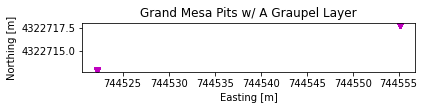

In [9]:
ax = df.plot(color='m', marker='v')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.ticklabel_format(style='plain', useOffset=False)
ax.set_title('Grand Mesa Pits w/ A Graupel Layer')
plt.tight_layout()

In [10]:
times = df['time'].unique()
print(times)

[datetime.time(23, 27, 46, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=0, name=None))
 datetime.time(23, 4, 59, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=0, name=None))
 datetime.time(23, 24, 6, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=0, name=None))]


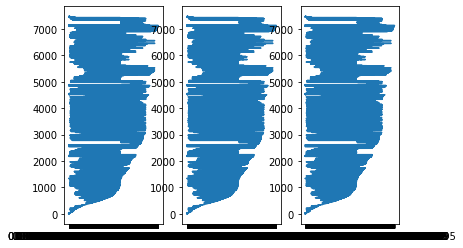

In [14]:
fig, axes = plt.subplots(1,len(times))
for i,t in enumerate(times):
    ind = df['time'] == t
    data = df.loc[ind].copy()
    data.set_index('depth',inplace=True)
    axes[i].plot(df['value'],df.index)
plt.show()